In [2]:
import pandas as pd

df = pd.read_csv("Open_Payments_Data.csv")

# Display the first few rows of the DataFrame to confirm it loaded correctly

print(df.head())

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [55]:
# List of columns you want to drop from the DataFrame
columns_to_drop = ['Change_Type','Recipient_Primary_Business_Street_Address_Line1','Recipient_Primary_Business_Street_Address_Line2',
                   'Recipient_Zip_Code','Covered_Recipient_Name_Suffix','Covered_Recipient_NPI','Covered_Recipient_Profile_ID',
    'Teaching_Hospital_CCN', 'Teaching_Hospital_ID', 'Teaching_Hospital_Name'
    , 'Recipient_Postal_Code',
    'Covered_Recipient_Primary_Type_2', 'Covered_Recipient_Primary_Type_3',
    'Covered_Recipient_Primary_Type_4', 'Covered_Recipient_Primary_Type_5',
    'Covered_Recipient_Primary_Type_6', 'Covered_Recipient_Specialty_2',
    'Covered_Recipient_Specialty_3', 'Covered_Recipient_Specialty_4',
    'Covered_Recipient_Specialty_5', 'Covered_Recipient_Specialty_6',
    'Covered_Recipient_License_State_code2', 'Covered_Recipient_License_State_code3',
    'Covered_Recipient_License_State_code4', 'Covered_Recipient_License_State_code5',
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID','City_of_Travel','State_of_Travel', 'Country_of_Travel',
    'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value',
    'Third_Party_Equals_Covered_Recipient_Indicator','Delay_in_Publication_Indicator',
    'Record_ID','Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',
    'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_2','Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_3',
    'Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_4','Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_5',
    'Associated_Drug_or_Biological_NDC_1', 'Associated_Drug_or_Biological_NDC_2',
    'Associated_Drug_or_Biological_NDC_3', 'Associated_Drug_or_Biological_NDC_4',
    'Associated_Drug_or_Biological_NDC_5', 'Associated_Device_or_Medical_Supply_PDI_1',
    'Associated_Device_or_Medical_Supply_PDI_2', 'Associated_Device_or_Medical_Supply_PDI_3',
    'Associated_Device_or_Medical_Supply_PDI_4', 'Associated_Device_or_Medical_Supply_PDI_5',
    'Program_Year','Payment_Publication_Date'
]

# Drop these columns from the DataFrame
df = df.drop(columns=columns_to_drop)

In [56]:
# Assuming df is your loaded DataFrame
# List of columns to check for the presence of the string "Device"
columns_to_check = [
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_2',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_3',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_4',
    'Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5'
]

# Apply a filter across these columns to retain rows where any column contains "Device"
filtered_df = df[
    df[columns_to_check].apply(lambda x: x.str.contains('Device', na=False)).any(axis=1)
]

In [57]:
# Define replacements in a dictionary
replacements = {
    'Alcon Vision LLC': 'Alcon Inc.',
    'Alcon Puerto Rico Inc': 'Alcon Inc.',
    'Alcon Research LLC': 'Alcon Inc.'
}

# Replace values in the DataFrame
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(replacements)

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_99067/3274020282.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(replacements)


In [58]:
# Define the column name for clarity and maintainability
column_name = 'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'

# List of Olympus-related names to be replaced
olympus_variants = [
    'Olympus Winter & Ibe GmbH', 'Olympus Latin America, Inc.',
    'Olympus Medical Systems Corporation', 'Olympus Corporation',
    'Olympus America Inc.', 'Olympus Corporation of the Americas'
]

# Replace these names with 'Olympus' in the DataFrame
filtered_df[column_name] = filtered_df[column_name].replace(olympus_variants, 'Olympus')

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_99067/2717218494.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[column_name] = filtered_df[column_name].replace(olympus_variants, 'Olympus')


In [59]:
# Define a regex pattern that matches all variations of "Johnson & Johnson" and "Johnson and Johnson"
pattern = r'Johnson\s*(?:&|and)\s*Johnson.*'

# Replace the values in the DataFrame
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value='Johnson & Johnson', regex=True)

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_99067/734888790.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value='Johnson & Johnson', regex=True)


In [60]:
# Regular expression to match any string starting with "B. Braun"
pattern = r'B\. Braun.*'

# Replace variations of "B. Braun" with "B. Braun"
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value='B. Braun', regex=True)

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_99067/689431660.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value='B. Braun', regex=True)


In [61]:
# Define the variations that need to be standardized
variations = ['GE HEALTHCARE', 'GE HealthCare']

# Replace variations with 'GE Healthcare'
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(variations, 'GE Healthcare')

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_99067/2818452852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(variations, 'GE Healthcare')


In [62]:
replacements = {
    'Fresenius USA Marketing, Inc.': 'Fresenius Medical Care',
    'Fresenius Kabi USA, LLC': 'Fresenius Medical Care'
}

# Apply the replacements to the GPO name column
# Replace the column name with your actual GPO name column if it differs
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(replacements)

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_99067/2187016389.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(replacements)


In [63]:
# Regex pattern to match the FUJIFILM variations
pattern = r'FUJIFILM.*'

# Replacement value
replacement = 'Fujifilm Holdings Corporation'

# Apply the replacement in the 'GPO Name' column (replace 'GPO Name' with your actual column name)
filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value=replacement, regex=True)


/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_99067/1767557031.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'] = filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].replace(to_replace=pattern, value=replacement, regex=True)


In [64]:
# List of companies to filter by
companies = [
    'Zimmer Biomet Holdings, Inc.', 'Medtronic, Inc.','Johnson & Johnson', 'Stryker Corporation', 
    'Abbott Laboratories', 'Boston Scientific Corporation','Intuitive Surgical, Inc.', 'Siemens Medical Solutions USA, Inc.', 
    'Becton, Dickinson and Company','Philips Electronics North America Corporation','Baxter Healthcare','3M Company',
    'Alcon Inc.','Olympus','B. Braun','GE Healthcare','Fresenius Medical Care','Fujifilm Holdings Corporation','ABBVIE INC.','Arthrex, Inc.'
]
 
# Filter the DataFrame to only include rows where the company name is in the list
filtered_records = filtered_df[filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].isin(companies)]

In [65]:
# List of companies to filter by
companies = [
    'Zimmer Biomet Holdings, Inc.', 'Medtronic, Inc.','Johnson & Johnson', 'Stryker Corporation', 
    'Abbott Laboratories', 'Boston Scientific Corporation','Intuitive Surgical, Inc.', 'Siemens Medical Solutions USA, Inc.',
    'Philips Electronics North America Corporation','Baxter Healthcare','3M Company','DePuy Synthes Sales Inc.','Smith+Nephew, Inc.',
    'Alcon Inc.','Olympus','ABBVIE INC.','Arthrex, Inc.','ATRICURE, INC.','ENCORE MEDICAL, LP','LivaNova USA, Inc.'
]

# Assuming the column 'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name' is where the GPO names are stored
# Filter 'filtered_df' to only include rows where the GPO name is in the list
finaldf = filtered_df[filtered_df['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name'].isin(companies)]

In [1]:
# Save finaldf to a CSV file
finaldf.to_csv('FinalDataFrame.csv', index=False)
df = pd.read_csv("FinalDataFrame.csv")

NameError: name 'finaldf' is not defined

In [12]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

# Load model and tokenizer
model_path = "malcolm/REA_GenderIdentification_v1"
tokenizer = AutoTokenizer.from_pretrained(model_path)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Running on device: {device}")
model.to(device)

# Read data
data_A = pd.read_csv('US1.csv')
data_A = data_A.dropna(subset=['FirstName', 'Gender'])

data_B = pd.read_csv('data.csv')
data_B = data_B.dropna(subset=['Name', 'Gender'])

# Load new dataset, where gender is correct and does not need reversal
data_C = pd.read_csv('IN1.csv')
data_C = data_C.dropna(subset=['FirstName', 'Gender'])

# Convert FirstName, Name, and Gender columns to lowercase
data_A['FirstName'] = data_A['FirstName'].str.lower()
data_B['Name'] = data_B['Name'].str.lower()
data_C['FirstName'] = data_C['FirstName'].str.lower()

# Create a dictionary mapping from names to gender
name_to_gender = {name: ('F' if gender == 'M' else 'M') for name, gender in zip(data_A['FirstName'], data_A['Gender'])}

# Update name-to-gender mapping using data from data_B with reversed gender
for name, gender in zip(data_B['Name'], data_B['Gender']):
    name_to_gender[name] = 'F' if gender == 'M' else 'M'

# Update name-to-gender mapping using data from data_C without reversing gender
for name, gender in zip(data_C['FirstName'], data_C['Gender']):
    name_to_gender[name] = gender

# Gender prediction function
def predict_gender(name):
    return name_to_gender.get(name.lower(), 'Unknown')  # Convert the input name to lowercase

# Read the third dataset and process
data_D = pd.read_csv('FinalDataFrame_2021.csv')
data_D = data_D.dropna(subset=['Covered_Recipient_First_Name'])

# Convert Covered_Recipient_First_Name to lowercase and predict gender
data_D['Covered_Recipient_First_Name'] = data_D['Covered_Recipient_First_Name'].fillna("").str.lower()
data_D['Gender'] = data_D['Covered_Recipient_First_Name'].apply(predict_gender)

# Find unmatched rows
unmatched_rows = data_D[data_D['Gender'] == 'Unknown'].copy()

# If there are unmatched rows, use the model to predict gender
if len(unmatched_rows) > 0:
    # Define batch size
    batch_size = 32
    
    # Initialize list for predictions
    unmatched_predictions = [None] * len(unmatched_rows)
    
    # Batch prediction using the model
    for i in range(0, len(unmatched_rows), batch_size):
        batch_names = unmatched_rows['Covered_Recipient_First_Name'][i:i+batch_size].tolist()
        
        # Filter out empty names and get valid indices
        non_empty_indices = [j for j, name in enumerate(batch_names) if name.strip() != ""]
        non_empty_names = [batch_names[j] for j in non_empty_indices]
        
        # Skip if no valid names in batch
        if len(non_empty_names) == 0:
            continue
        
        # Tokenize names and move to device
        inputs = tokenizer(non_empty_names, return_tensors="pt", padding=True, truncation=True).to(device)
        
        # Model prediction
        with torch.no_grad():
            outputs = model(**inputs)
        
        # Get prediction results (1 represents F, 0 represents M)
        logits = outputs.logits
        batch_predictions = torch.argmax(logits, dim=1).cpu().tolist()
        
        # Save predictions back to list, keeping the predictions as they are
        for idx, prediction in zip(non_empty_indices, batch_predictions):
            unmatched_predictions[i + idx] = "F" if prediction == 1 else "M"
    
    # Update the Gender column in unmatched rows
    unmatched_rows['Gender'] = unmatched_predictions
    
    # Update the original data with the newly predicted genders
    data_D.update(unmatched_rows)

# Calculate unmatched rate
total_count = len(data_D)
unmatched_count = len(data_D[data_D['Gender'] == 'Unknown'])
unmatched_rate = unmatched_count / total_count
print("Unrecognized rate:", unmatched_rate)

# Save the results as a new CSV file, including the Gender column
output_path = "FinalDataFrame_with_Gender_Predictions_2021.csv"
data_D.to_csv(output_path, index=False)

print(f"Gender predictions saved to {output_path}")

Running on device: cpu


/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_67178/2978693896.py:47: DtypeWarning: Columns (7,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  data_D = pd.read_csv('FinalDataFrame_2021.csv')


Unrecognized rate: 0.0
Gender predictions saved to FinalDataFrame_with_Gender_Predictions_2021.csv


In [71]:
# Load the CSV file with low_memory=False to avoid the mixed types warning
newDf = pd.read_csv('FinalDataFrame_with_Gender_Predictions_done.csv', low_memory=False)
pd.set_option('display.width', 1000)  # Adjust the width as needed
pd.set_option('display.max_columns', 10)  # Set max columns to display in a row

# Display the first 10 records
print(newDf.head(10))

        Covered_Recipient_Type Covered_Recipient_First_Name Covered_Recipient_Middle_Name Covered_Recipient_Last_Name Recipient_City  ... Product_Category_or_Therapeutic_Area_4 Covered_or_Noncovered_Indicator_5 Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_5 Product_Category_or_Therapeutic_Area_5 Gender
0  Covered Recipient Physician                          ben                           NaN                         RAD         FRESNO  ...                                    NaN                               NaN                                                NaN                                           NaN      M
1  Covered Recipient Physician                         sana                           NaN                     QURESHI         POMONA  ...                                    NaN                               NaN                                                NaN                                           NaN      F
2  Covered Recipient Physician                      tau

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_99067/1418581609.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_payments_by_gender, x='Gender', y='Total_Amount_of_Payment_USDollars', palette=color_palette)


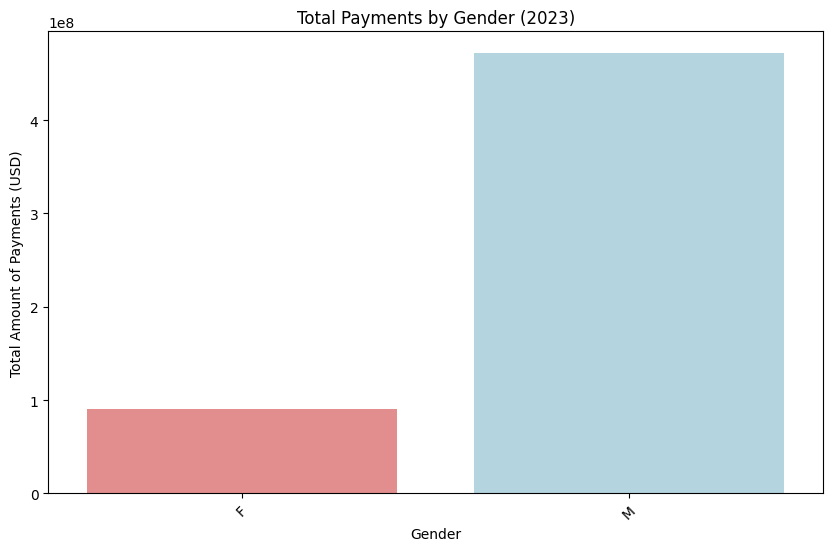

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
# 1. Total Payments by Gender
total_payments_by_gender = newDf.groupby('Gender')['Total_Amount_of_Payment_USDollars'].sum().reset_index()
plt.figure(figsize=(10, 6))
color_palette = {'M': 'lightblue', 'F': 'lightcoral'}
sns.barplot(data=total_payments_by_gender, x='Gender', y='Total_Amount_of_Payment_USDollars', palette=color_palette)
plt.title('Total Payments by Gender (2023)')
plt.xlabel('Gender')
plt.ylabel('Total Amount of Payments (USD)')
plt.xticks(rotation=45)
plt.show()

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_99067/3511321379.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_payments_by_gender, x='Gender', y='Total_Amount_of_Payment_USDollars', palette=color_palette)


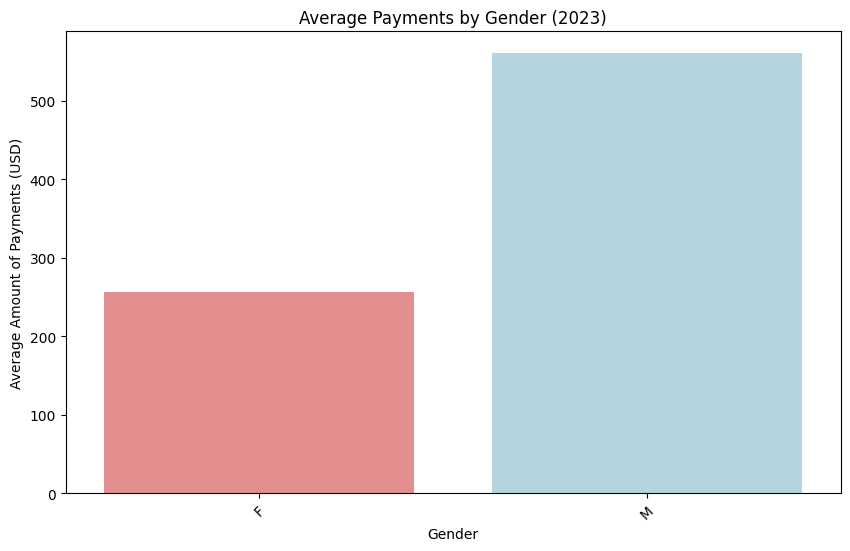

In [78]:
# 2. Average Payments by Gender
average_payments_by_gender = newDf.groupby('Gender')['Total_Amount_of_Payment_USDollars'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=average_payments_by_gender, x='Gender', y='Total_Amount_of_Payment_USDollars', palette=color_palette)
plt.title('Average Payments by Gender (2023)')
plt.xlabel('Gender')
plt.ylabel('Average Amount of Payments (USD)')
plt.xticks(rotation=45)
plt.show()

<Figure size 1500x800 with 0 Axes>

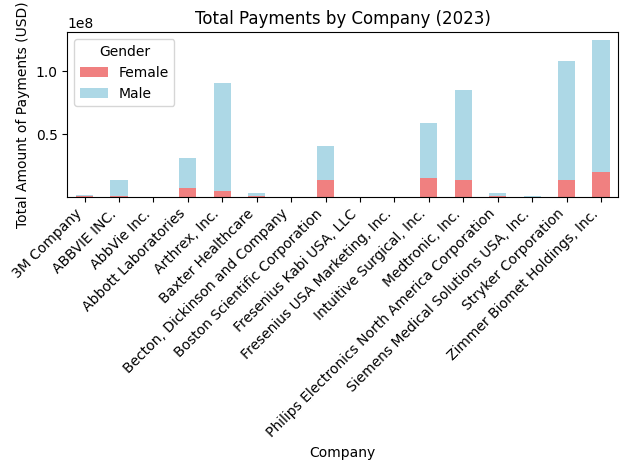

In [79]:
company_gender_payments = newDf.groupby(
    ['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name', 'Gender']
)['Total_Amount_of_Payment_USDollars'].sum().unstack().fillna(0)
# Plotting Total Payments by Company for Males and Females
plt.figure(figsize=(15, 8))
company_gender_payments.plot(kind='bar', stacked=True, color=['lightcoral', 'lightblue'])
plt.title('Total Payments by Company (2023)')
plt.xlabel('Company')
plt.ylabel('Total Amount of Payments (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

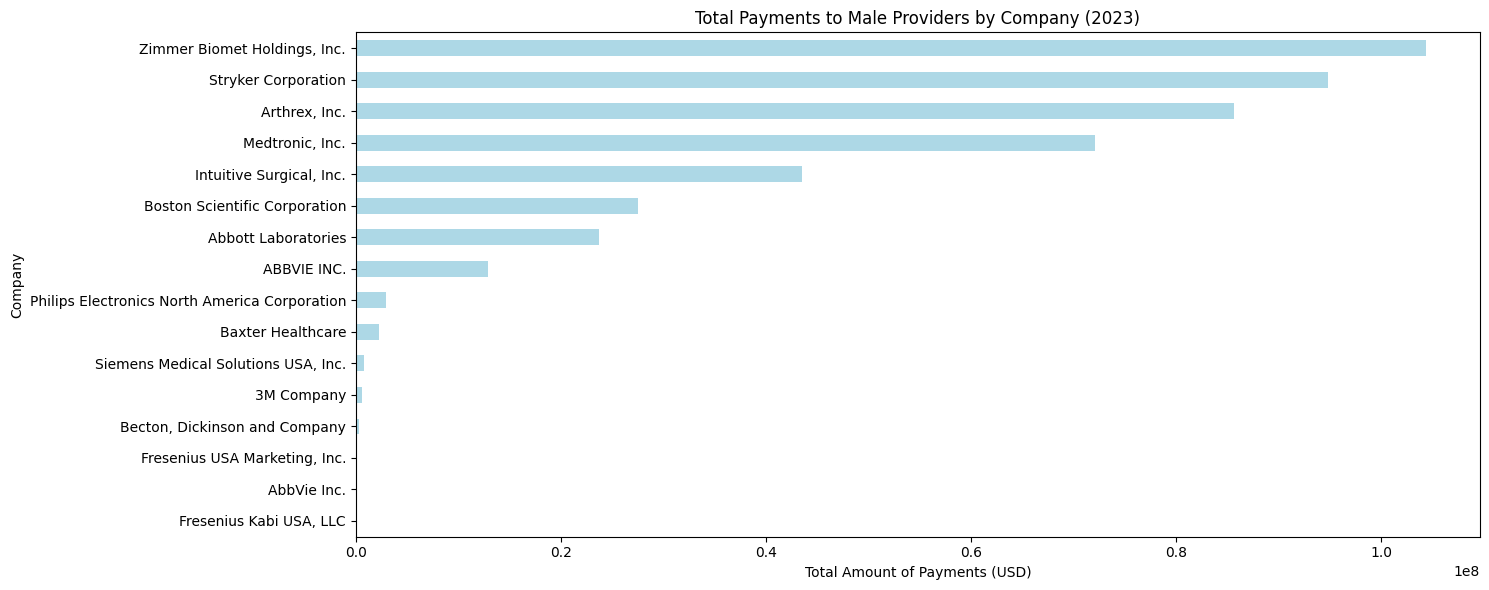

In [80]:
# 1. Total Payments for Males
male_payments = company_gender_payments['M']
plt.figure(figsize=(15, 6))
male_payments.sort_values().plot(kind='barh', color='lightblue')
plt.title('Total Payments to Male Providers by Company (2023)')
plt.xlabel('Total Amount of Payments (USD)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()



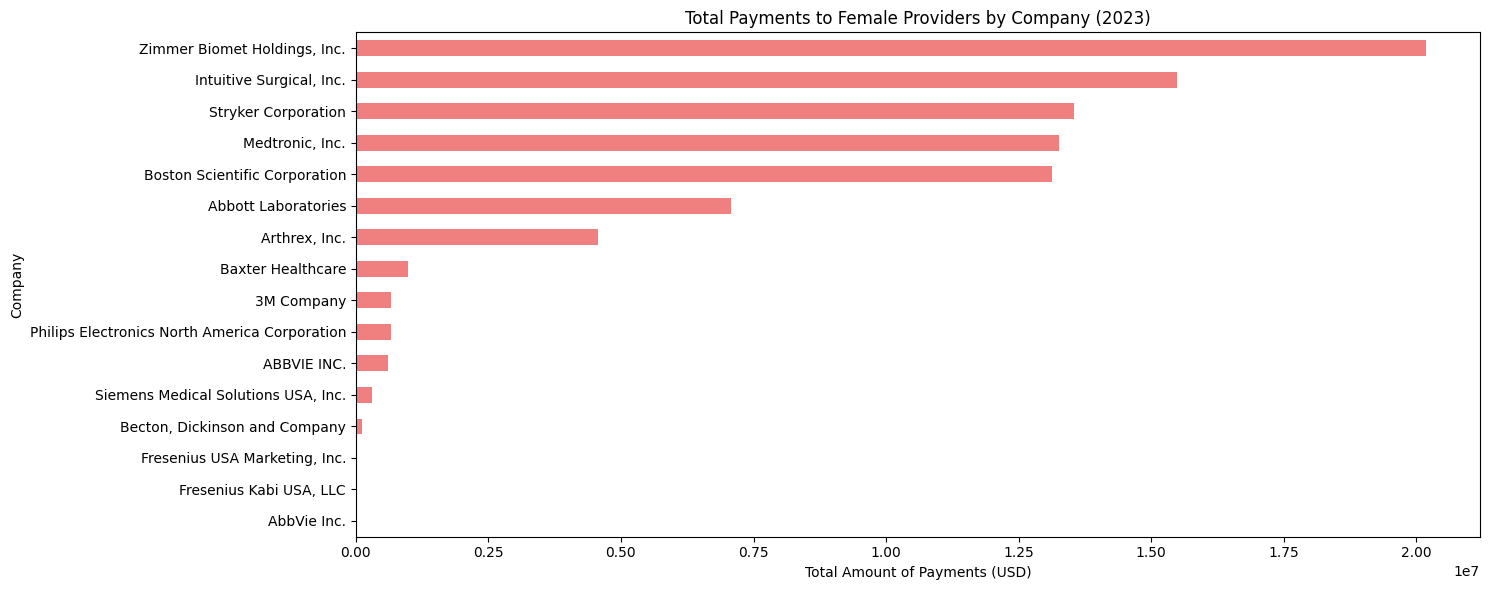

In [81]:
# 2. Total Payments for Females
female_payments = company_gender_payments['F']
plt.figure(figsize=(15, 6))
female_payments.sort_values().plot(kind='barh', color='lightcoral')
plt.title('Total Payments to Female Providers by Company (2023)')
plt.xlabel('Total Amount of Payments (USD)')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

In [82]:
gender_counts = newDf['Gender'].value_counts()

print(gender_counts)

Gender
M    841569
F    353260
Name: count, dtype: int64
